<a href="https://colab.research.google.com/github/LakshmiSrivastava/DataAnalysisAndMachineLearning/blob/main/AerofitDescriptiveStats_and_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as san

In [ ]:
adf=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [ ]:
adf.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
adf.shape

(180, 9)

In [ ]:
adf.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
adf.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [ ]:
adf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
Price=pd.DataFrame({"Product" : ['KP281','KP481', 'KP781'],
                    "Price":[1500,1750,2500]})
Price

,Product,Price
0,KP281,1500
1,KP481,1750
2,KP781,2500


In [ ]:
adf=adf.merge(Price, on="Product", how="left")
adf

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Price
0,KP281,18,Male,14,Single,3,4,29562,112,1500
1,KP281,19,Male,15,Single,2,3,31836,75,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500
3,KP281,19,Male,12,Single,3,3,32973,85,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500
176,KP781,42,Male,18,Single,5,4,89641,200,2500
177,KP781,45,Male,16,Single,5,5,90886,160,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500


<ipython-input-5-66136547de95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  san.heatmap(adf.corr(), annot=True)


<Axes: >

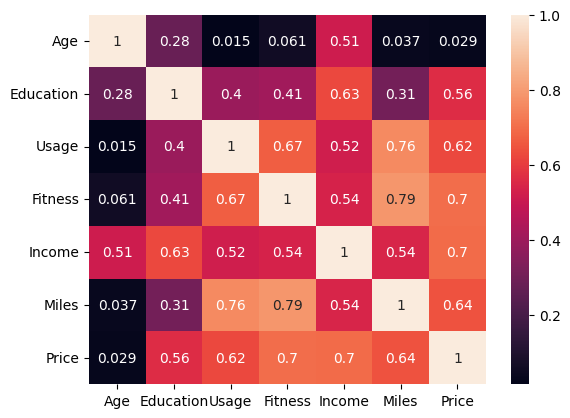

In [ ]:
san.heatmap(adf.corr(), annot=True)

In [ ]:
adf.corr().unstack()[(adf.corr().unstack()>0.6)& (adf.corr().unstack()!=1)]

<ipython-input-7-f7f4b52a01e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  adf.corr().unstack()[(adf.corr().unstack()>0.6)& (adf.corr().unstack()!=1)]


Education  Income       0.625827
Usage      Fitness      0.668606
           Miles        0.759130
           Price        0.623124
Fitness    Usage        0.668606
           Miles        0.785702
           Price        0.696616
Income     Education    0.625827
           Price        0.695847
Miles      Usage        0.759130
           Fitness      0.785702
           Price        0.643923
Price      Usage        0.623124
           Fitness      0.696616
           Income       0.695847
           Miles        0.643923
dtype: float64

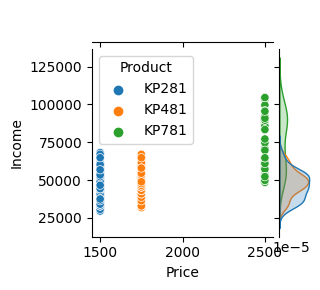

In [ ]:
san.jointplot(x=adf['Price'], y=adf['Income'], height=3, hue=adf['Product'])

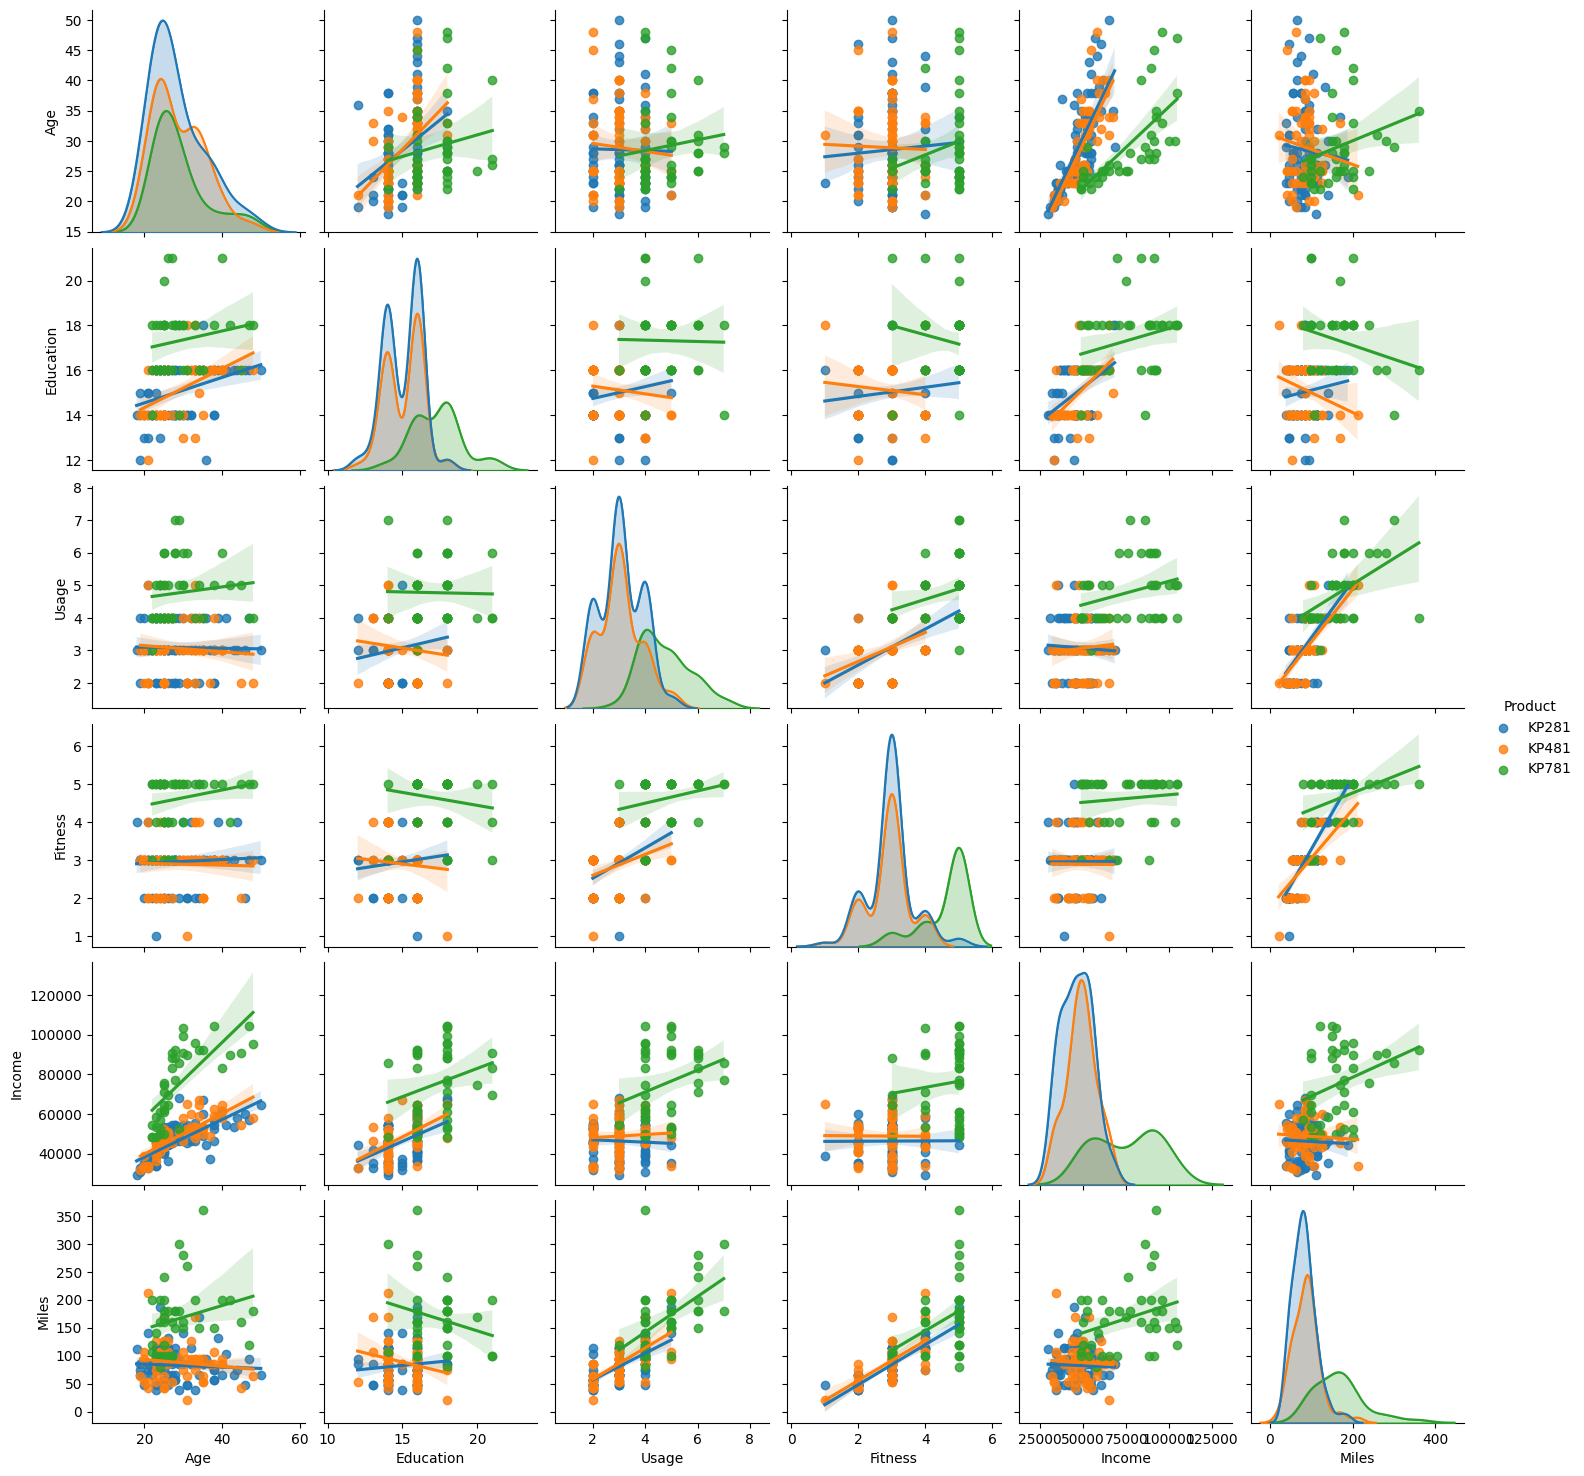

In [ ]:
corrPair=san.pairplot(adf, kind='reg', hue='Product')
corrPair.map_diag(san.kdeplot)
plt.show()

<Axes: xlabel='Miles', ylabel='Count'>

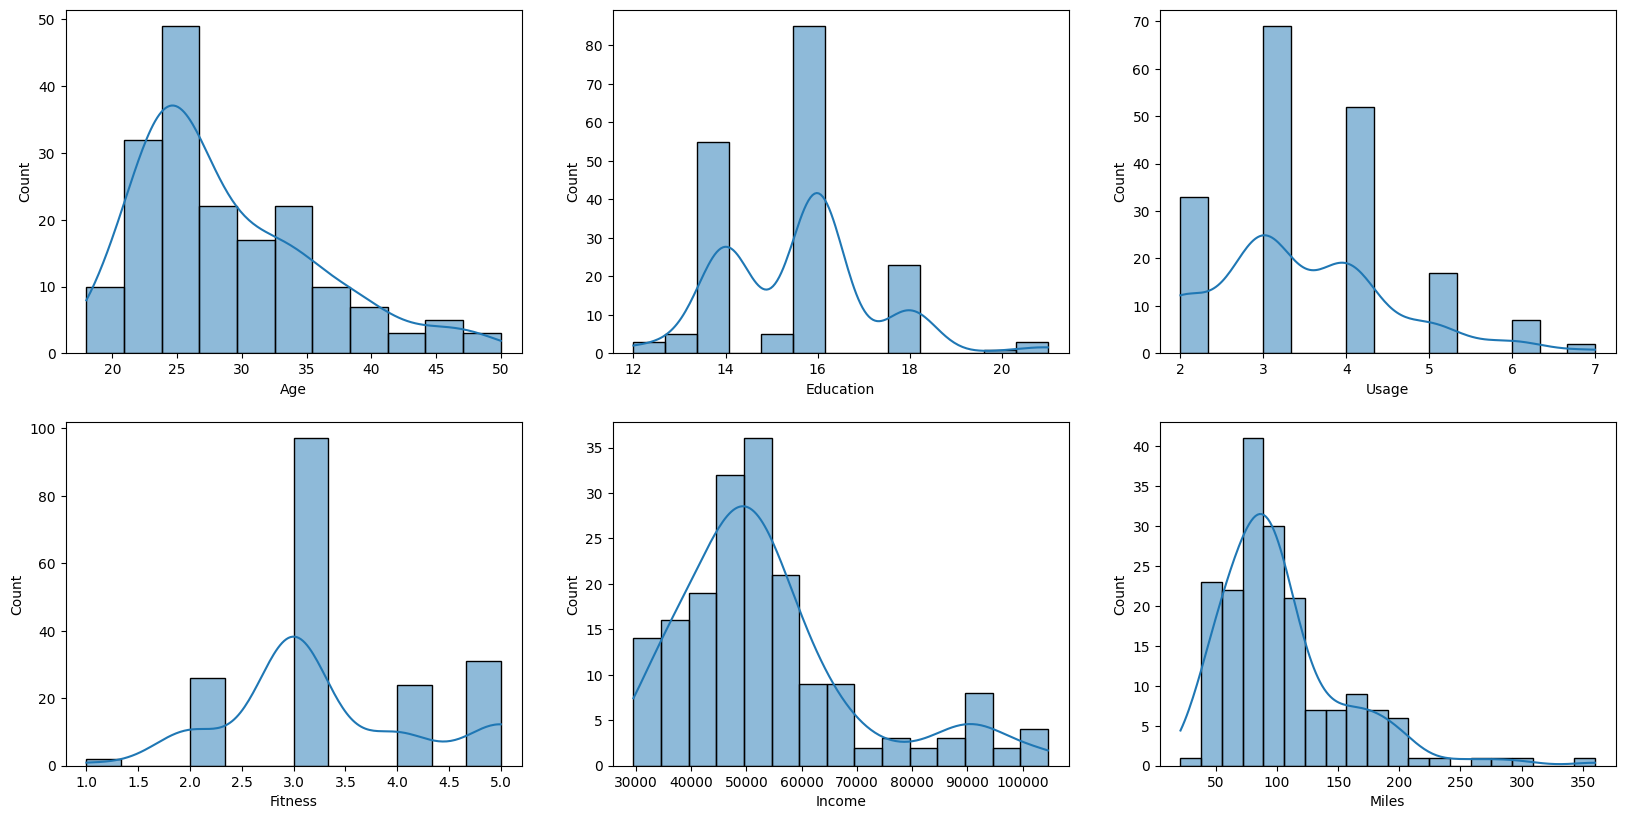

In [ ]:
f,a=plt.subplots(nrows=2, ncols=3, figsize=(20,4))
f.subplots_adjust(top=2)
san.histplot(data=adf,x='Age', kde=True,ax=a[0,0])
san.histplot(data=adf, x='Education', kde=True, ax=a[0,1])
san.histplot(data=adf, x='Usage', kde=True, ax=a[0,2])
san.histplot(data=adf, x='Fitness', kde=True, ax=a[1,0])
san.histplot(data=adf, x='Income', kde=True, ax=a[1,1])
san.histplot(data=adf, x='Miles', kde=True, ax=a[1,2])

<Axes: xlabel='Miles'>

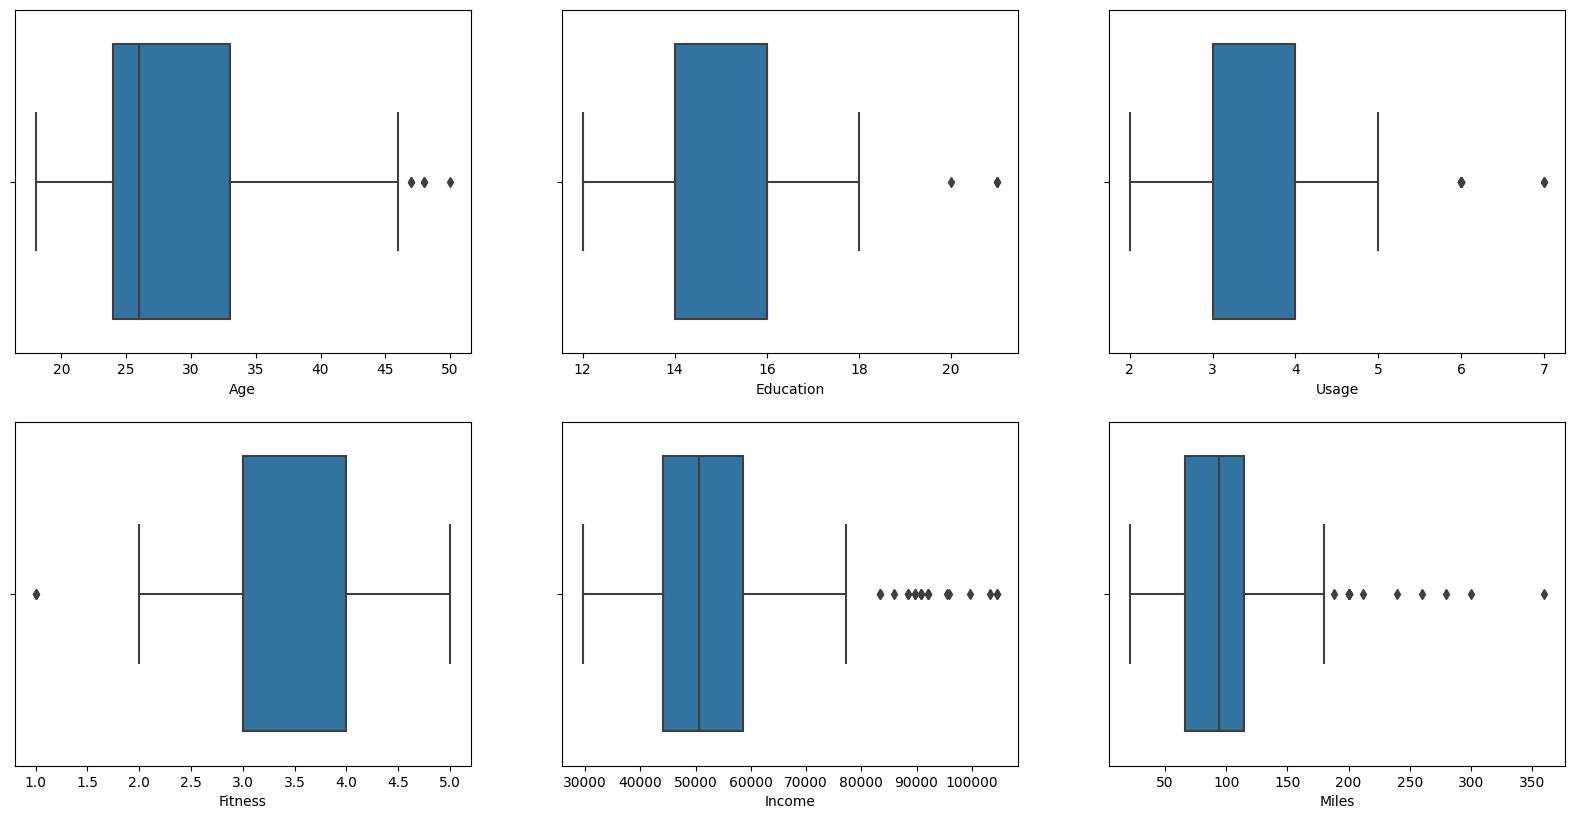

In [ ]:
f,a=plt.subplots(nrows=2, ncols=3, figsize=(20,4))
f.subplots_adjust(top=2)
san.boxplot(data=adf,x='Age', orient='h',ax=a[0,0])
san.boxplot(data=adf, x='Education', orient='h', ax=a[0,1])
san.boxplot(data=adf, x='Usage', orient='h', ax=a[0,2])
san.boxplot(data=adf, x='Fitness', orient='h', ax=a[1,0])
san.boxplot(data=adf, x='Income', orient='h', ax=a[1,1])
san.boxplot(data=adf, x='Miles', orient='h', ax=a[1,2])

<Axes: xlabel='MaritalStatus', ylabel='count'>

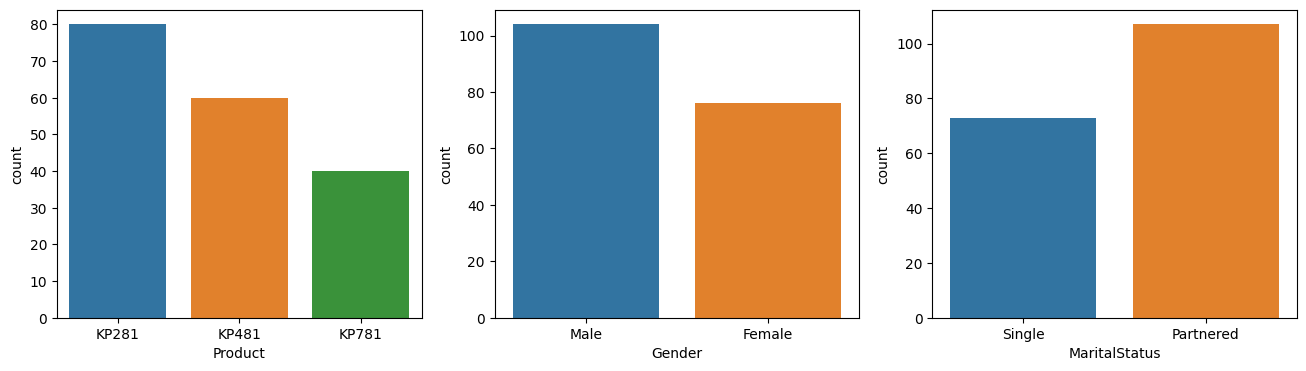

In [ ]:
f,a=plt.subplots(nrows=1, ncols=3, figsize=(16,4))
san.countplot(data=adf,x='Product', ax=a[0])
san.countplot(data=adf, x='Gender', ax=a[1])
san.countplot(data=adf, x='MaritalStatus', ax=a[2])

In [ ]:
adf1=adf[['Product','Gender','MaritalStatus']].melt()
adf1.groupby(['variable','value'])[['value']].count()/len(adf)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Text(0.5, 1.0, 'Impact of MaritalStatus on Product')

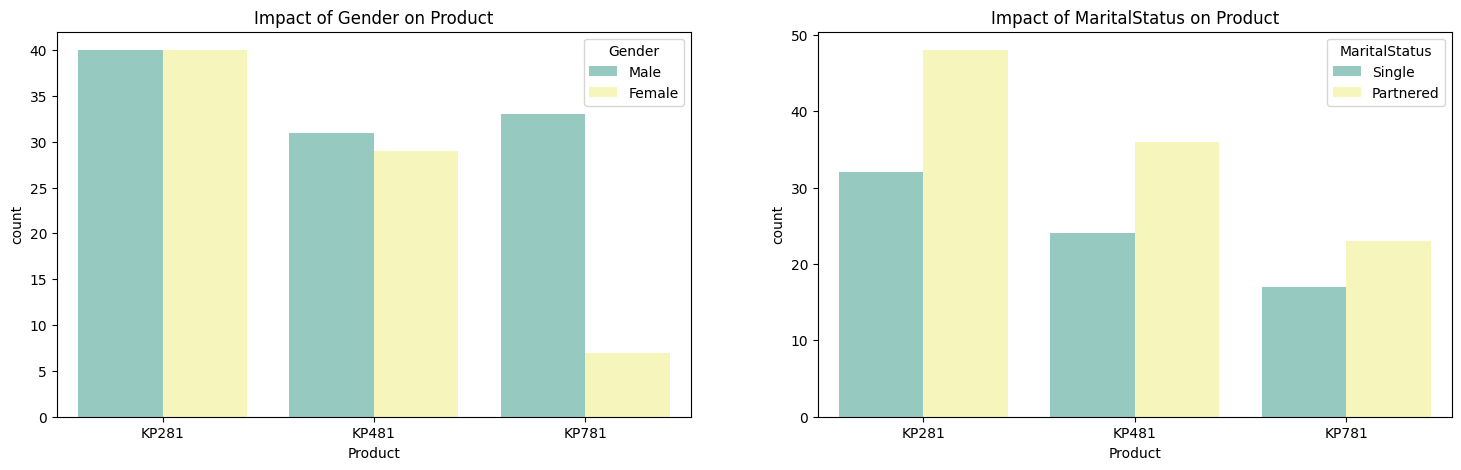

In [ ]:
f,a=plt.subplots(nrows=1, ncols=2, figsize=(18,5))
san.countplot(data=adf,x='Product', hue='Gender', ax=a[0],palette='Set3')
san.countplot(data=adf, x='Product', hue='MaritalStatus', ax=a[1],palette='Set3' )
a[0].set_title('Impact of Gender on Product')
a[1].set_title('Impact of MaritalStatus on Product')

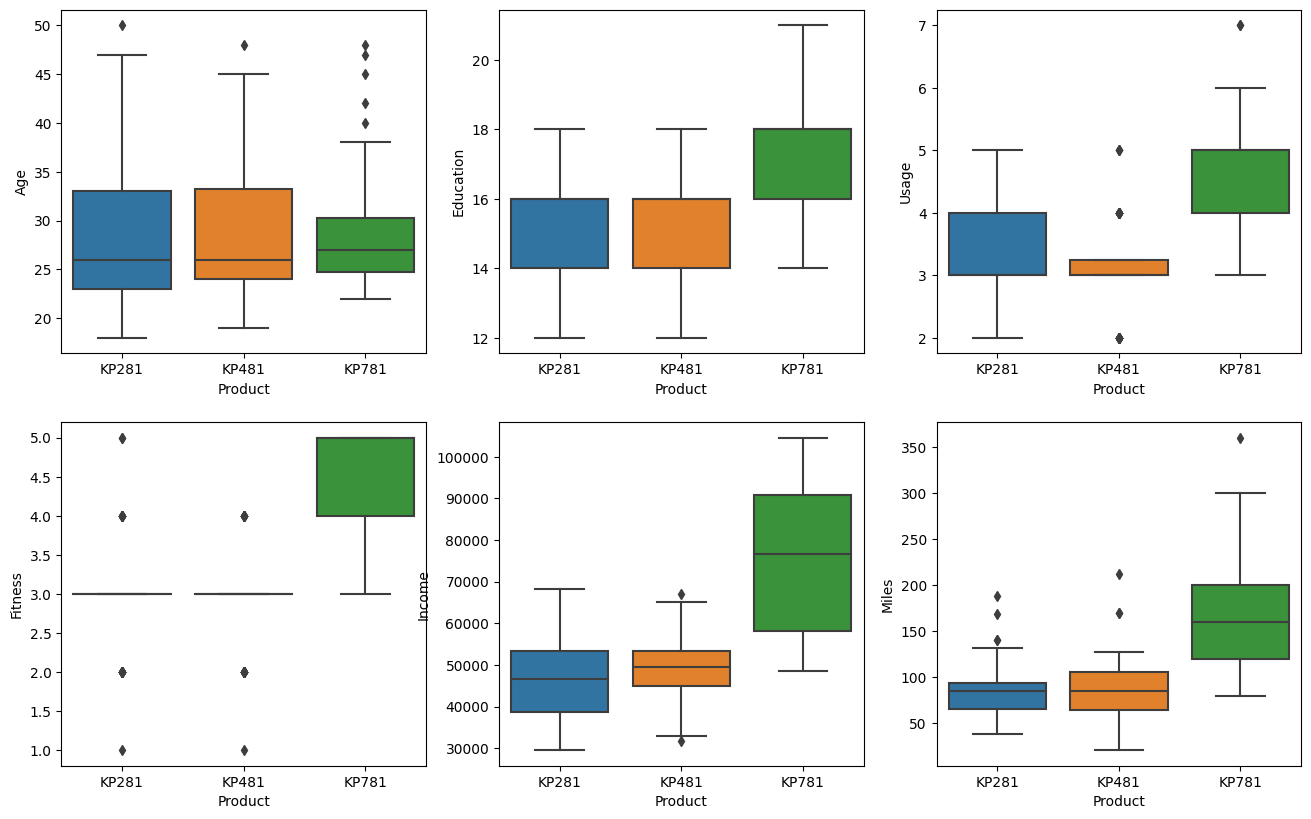

In [ ]:
list=['Age','Education','Usage','Fitness','Income','Miles']
f,a=plt.subplots(nrows=2, ncols=3, figsize=(16,4))
f.subplots_adjust(top=2)
count=0
for i in range(2):
  for j in range(3):
    san.boxplot(data=adf, x='Product', y=list[count], ax=a[i,j])
    count+=1

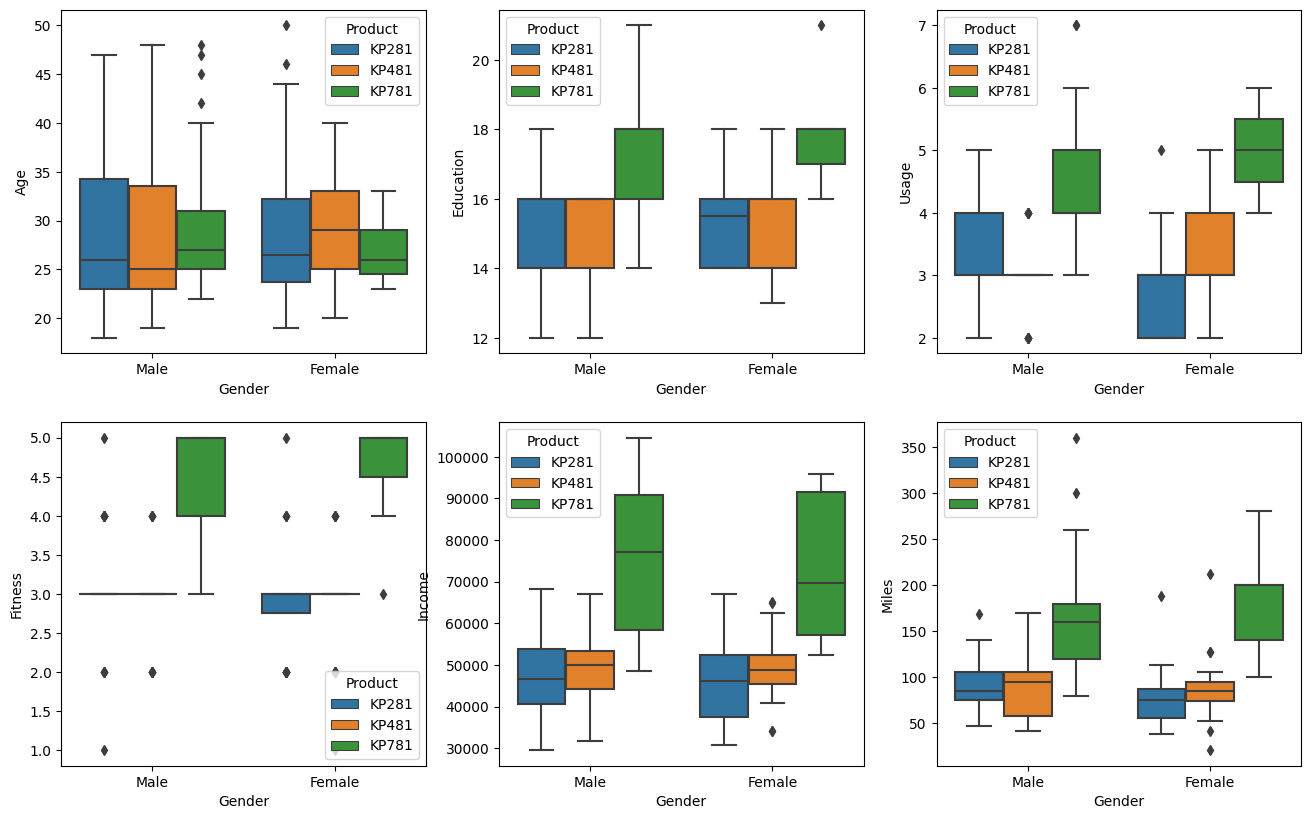

In [ ]:
list=['Age','Education','Usage','Fitness','Income','Miles']
f,a=plt.subplots(nrows=2, ncols=3, figsize=(16,4))
f.subplots_adjust(top=2)
count=0
for i in range(2):
  for j in range(3):
    san.boxplot(data=adf, x='Gender', y=list[count], hue='Product', ax=a[i,j])
    count+=1

In [ ]:
adf['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
def p_product_given_gender(gender, print_marginal=False):
  adf1=pd.crosstab(index=adf['Gender'], columns=[adf['Product']])
  p_kp281=round(adf1['KP281'][gender]/adf1.loc[gender].sum(),2)
  p_kp481=round(adf1['KP481'][gender]/adf1.loc[gender].sum(),2)
  p_kp781=round(adf1['KP781'][gender]/adf1.loc[gender].sum(),2)
  if print_marginal:
    print(f"P[M] : {adf1.loc['Male'].sum()/len(adf) :.2f}")
    print(f"P[F] : {adf1.loc['Female'].sum()/len(adf) :.2f}")
  print()
  print(f"For {gender}")
  print('P[kp281] : ', p_kp281)
  print('P[kp481] : ',p_kp481)
  print('P[kp781] : ',p_kp781)

p_product_given_gender('Male',True)
p_product_given_gender('Female')

P[M] : 0.58
P[F] : 0.42

For Male
P[kp281] :  0.38
P[kp481] :  0.3
P[kp781] :  0.32

For Female
P[kp281] :  0.53
P[kp481] :  0.38
P[kp781] :  0.09


In [ ]:
def p_product_given_maritalS(mstatus, print_marginal=False):
  adf1=pd.crosstab(index=adf['MaritalStatus'], columns=[adf['Product']])
  p_kp281=round(adf1['KP281'][mstatus]/adf1.loc[mstatus].sum(),2)
  p_kp481=round(adf1['KP481'][mstatus]/adf1.loc[mstatus].sum(),2)
  p_kp781=round(adf1['KP781'][mstatus]/adf1.loc[mstatus].sum(),2)
  if print_marginal:
    print(f"P[Single] : {adf1.loc['Single'].sum()/len(adf) :.2f}")
    print(f"P[Partnered] : {adf1.loc['Partnered'].sum()/len(adf) :.2f}")
  print()
  print(f"For {mstatus}")
  print('P[kp281] : ', p_kp281)
  print('P[kp481] : ',p_kp481)
  print('P[kp781] : ',p_kp781)

p_product_given_maritalS('Single',True)
p_product_given_maritalS('Partnered')

P[Single] : 0.41
P[Partnered] : 0.59

For Single
P[kp281] :  0.44
P[kp481] :  0.33
P[kp781] :  0.23

For Partnered
P[kp281] :  0.45
P[kp481] :  0.34
P[kp781] :  0.21


In [ ]:
adf["ageCat"]=adf["Age"]
adf["ageCat"]=pd.cut(adf['ageCat'], bins=[0,20,35,45,90], labels=['Youth0_20','adult21_35','midAge35_45','Old>45'])
adf.head(10)
def p_product_given_ageCat(ageCat, print_marginal=False):
  adf1=pd.crosstab(index=adf['ageCat'], columns=[adf['Product']])
  p_kp281=round(adf1['KP281'][ageCat]/adf1.loc[ageCat].sum(),2)
  p_kp481=round(adf1['KP481'][ageCat]/adf1.loc[ageCat].sum(),2)
  p_kp781=round(adf1['KP781'][ageCat]/adf1.loc[ageCat].sum(),2)
  if print_marginal:
    print(f"P[Youth0_20] : {adf1.loc['Youth0_20'].sum()/len(adf) :.2f}")
    print(f"P[adult21_35] : {adf1.loc['adult21_35'].sum()/len(adf) :.2f}")
    print(f"P[midAge35_45] : {adf1.loc['midAge35_45'].sum()/len(adf) :.2f}")
    print(f"P[Old>45] : {adf1.loc['Old>45'].sum()/len(adf) :.2f}")
  print()
  print(f"For {ageCat}")
  print('P[kp281] : ', p_kp281)
  print('P[kp481] : ',p_kp481)
  print('P[kp781] : ',p_kp781)
p_product_given_ageCat('Youth0_20',True)
p_product_given_ageCat('adult21_35')
p_product_given_ageCat('midAge35_45')
p_product_given_ageCat('Old>45')

P[Youth0_20] : 0.06
P[adult21_35] : 0.79
P[midAge35_45] : 0.12
P[Old>45] : 0.03

For Youth0_20
P[kp281] :  0.6
P[kp481] :  0.4
P[kp781] :  0.0

For adult21_35
P[kp281] :  0.42
P[kp481] :  0.34
P[kp781] :  0.24

For midAge35_45
P[kp281] :  0.5
P[kp481] :  0.32
P[kp781] :  0.18

For Old>45
P[kp281] :  0.5
P[kp481] :  0.17
P[kp781] :  0.33


In [ ]:
adf["ageCat"]=adf["Age"]
adf["ageCat"]=pd.cut(adf['ageCat'], bins=[0,20,35,45,90], labels=['Youth0_20','adult21_35','midAge35_45','Old>45'])
adf.head(10)
def p_product_given_ageCat(ageCat, print_marginal=False):
  adf1=pd.crosstab(index=adf['ageCat'], columns=[adf['Product']])
  p_kp281=round(adf1['KP281'][ageCat]/adf1.loc[ageCat].sum(),2)
  p_kp481=round(adf1['KP481'][ageCat]/adf1.loc[ageCat].sum(),2)
  p_kp781=round(adf1['KP781'][ageCat]/adf1.loc[ageCat].sum(),2)
  if print_marginal:
    print(f"P[Youth0_20] : {adf1.loc['Youth0_20'].sum()/len(adf) :.2f}")
    print(f"P[adult21_35] : {adf1.loc['adult21_35'].sum()/len(adf) :.2f}")
    print(f"P[midAge35_45] : {adf1.loc['midAge35_45'].sum()/len(adf) :.2f}")
    print(f"P[Old>45] : {adf1.loc['Old>45'].sum()/len(adf) :.2f}")
  print()
  print(f"For {ageCat}")
  print('P[kp281] : ', p_kp281)
  print('P[kp481] : ',p_kp481)
  print('P[kp781] : ',p_kp781)
p_product_given_ageCat('Youth0_20',True)
p_product_given_ageCat('adult21_35')
p_product_given_ageCat('midAge35_45')
p_product_given_ageCat('Old>45')

In [ ]:
np.round(pd.crosstab(index=adf['Product'], columns=adf['Fitness'],normalize='columns', margins=True)*100,2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,50.0,53.85,55.67,37.50,6.45,44.44
KP481,50.0,46.15,40.21,33.33,0.00,33.33
KP781,0.0,0.00,4.12,29.17,93.55,22.22


In [ ]:
adf["ageCat"]=adf["Age"]
adf["ageCat"]=pd.cut(adf['ageCat'], bins=[0,20,35,45,90], labels=['Youth0_20','adult21_35','midAge35_50','OldG50'])
adf.loc[adf["ageCat"]=='OldG50']

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,ageCat
77,KP281,46,Female,16,Partnered,3,2,60261,47,OldG50
78,KP281,47,Male,16,Partnered,4,3,56850,94,OldG50
79,KP281,50,Female,16,Partnered,3,3,64809,66,OldG50
139,KP481,48,Male,16,Partnered,2,3,57987,64,OldG50
178,KP781,47,Male,18,Partnered,4,5,104581,120,OldG50
179,KP781,48,Male,18,Partnered,4,5,95508,180,OldG50


In [ ]:
IQR=np.percentile(adf['Miles'],75)-np.percentile(adf['Miles'],25)
print("IQR : ",IQR)
Q1=np.percentile(adf['Miles'],25)
print('Q1 : ',Q1)
Q3=np.percentile(adf['Miles'],75)
print('Q3 : ', Q3)
upperlimit=Q3+(IQR*1.5)
print("upperlimit : ",upperlimit)
lowerlimit=Q1-(IQR*1.5)
print("lowerlimit : ",lowerlimit)
outlierMiles=adf[(adf['Miles']>upperlimit) |(adf['Miles']<lowerlimit)]
print("outlierMiles : ",len(outlierMiles))

IQR :  48.75
Q1 :  66.0
Q3 :  114.75
upperlimit :  187.875
lowerlimit :  -7.125
outlierMiles :  13


In [ ]:
IQR=np.percentile(adf['Income'],75)-np.percentile(adf['Income'],25)
print("IQR : ",IQR)
Q1=np.percentile(adf['Income'],25)
print('Q1 : ',Q1)
Q3=np.percentile(adf['Income'],75)
print('Q3 : ', Q3)
upperlimit=Q3+(IQR*1.5)
print("upperlimit : ",upperlimit)
lowerlimit=Q1-(IQR*1.5)
print("lowerlimit : ",lowerlimit)
outlierIncome=adf[(adf['Income']>upperlimit) |(adf['Income']<lowerlimit)]
print("outlierIncome : ",len(outlierIncome))

IQR :  14609.25
Q1 :  44058.75
Q3 :  58668.0
upperlimit :  80581.875
lowerlimit :  22144.875
outlierIncome :  19


In [ ]:
(pd.crosstab(adf["Product"], adf["Gender"],margins=True)/180)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


In [ ]:
adf1=pd.crosstab(index=adf['Product'], columns=[adf['Gender']], margins=True)
adf1



Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180
